In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics

In [3]:
df = pd.read_csv('orders_20190822.csv', sep=";", parse_dates=['o_date'],  decimal=',')  

In [4]:
df.head()

,id_o,user_id,price,o_date
0,1234491,337544,539.0,2016-01-01
1,1234494,171642,153.3,2016-01-01
2,1234497,260596,55.3,2016-01-01
3,1234498,1105609,752.5,2016-01-01
4,1234500,982696,4410.0,2016-01-01


In [5]:
df1 = df[['price', 'o_date']]

In [6]:
df1

,price,o_date
0,539.0,2016-01-01
1,153.3,2016-01-01
2,55.3,2016-01-01
3,752.5,2016-01-01
4,4410.0,2016-01-01
...,...,...
2002799,825.3,2017-12-31
2002800,4934.3,2017-12-31
2002801,804.3,2017-12-31
2002802,5019.7,2017-12-31


In [7]:
per = df1['o_date'].dt.to_period("D")
g = df1.groupby(per)
df2 = g.price.agg('count')

In [8]:
df2

o_date
2016-01-01     627
2016-01-02    1609
2016-01-03    1668
2016-01-04    1579
2016-01-05     739
              ... 
2017-12-27    4110
2017-12-28    3121
2017-12-29    2543
2017-12-30    2072
2017-12-31     973
Freq: D, Name: price, Length: 731, dtype: int64

In [9]:
df2.index

PeriodIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
             '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
             '2016-01-09', '2016-01-10',
             ...
             '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
             '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
             '2017-12-30', '2017-12-31'],
            dtype='period[D]', name='o_date', length=731, freq='D')

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

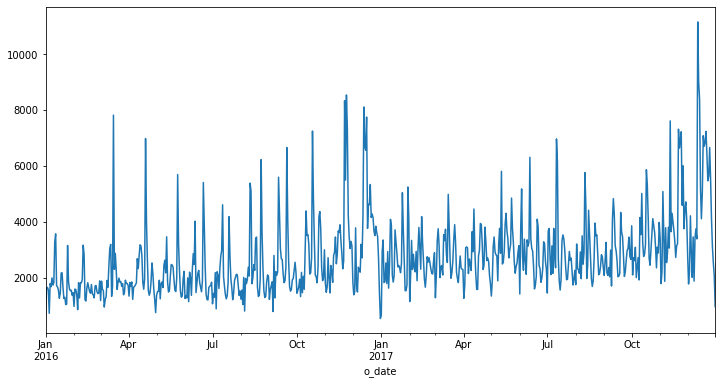

In [13]:
df2.plot(figsize=(12,6))

In [12]:
len(df2)

731

In [23]:
df2

In [19]:
model = sm.tsa.ARIMA(df2, order=(1,1,1), freq='W').fit(full_output=False, disp=0)

ValueError: unrecognized data structures: <class 'pandas.core.resample.PeriodIndexResampler'> / <class 'NoneType'>